## Introduction

This project involves analyzing a telecom dataset to predict customer churn using various machine learning techniques.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Loading and Inspecting the Dataset

The dataset has been successfully loaded and inspected. The data consists of customer information, and the 'Churn' column indicates if a customer has churned (1) or not (0).


In [99]:
data=pd.read_csv('Telcom_Customer.csv')

## Preprocessing the Data

The data has been preprocessed, with 'TotalCharges' converted to numeric, missing values handled, and categorical variables encoded as numeric.


In [101]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [104]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [105]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [106]:
data.gender.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [107]:
data.tenure.mean()

32.37114865824223

In [108]:
data.tenure.std()

24.55948102309423

## Visualization of the Data
The data need to be visualized to analyse in the easiest way with the help of diagrams.


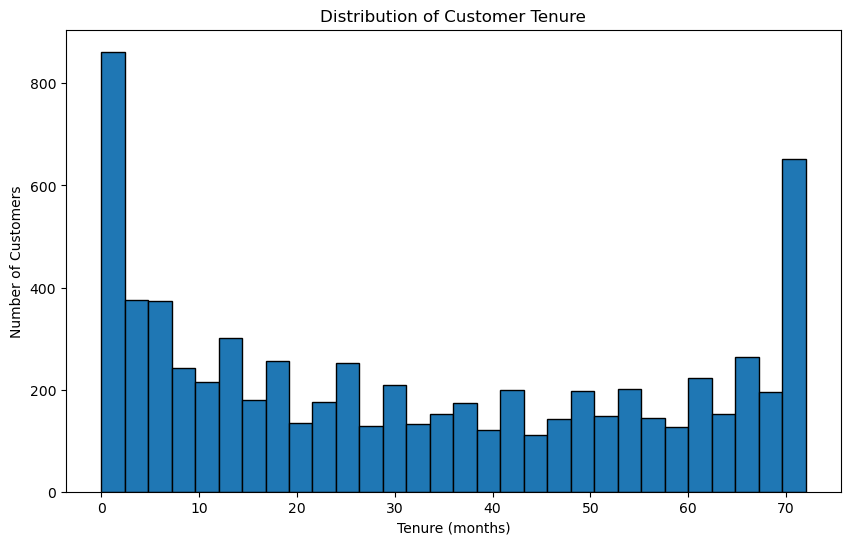

In [109]:
plt.figure(figsize=(10, 6))
plt.hist(data['tenure'], bins=30, edgecolor='black')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Tenure')
plt.show()


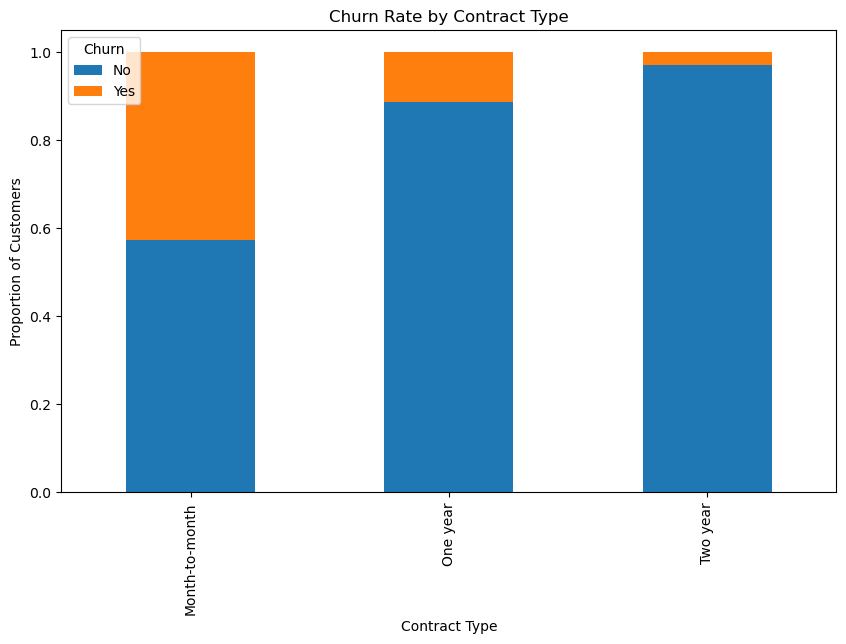

In [110]:
churn_by_contract = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_contract.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Contract Type')
plt.ylabel('Proportion of Customers')
plt.title('Churn Rate by Contract Type')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()


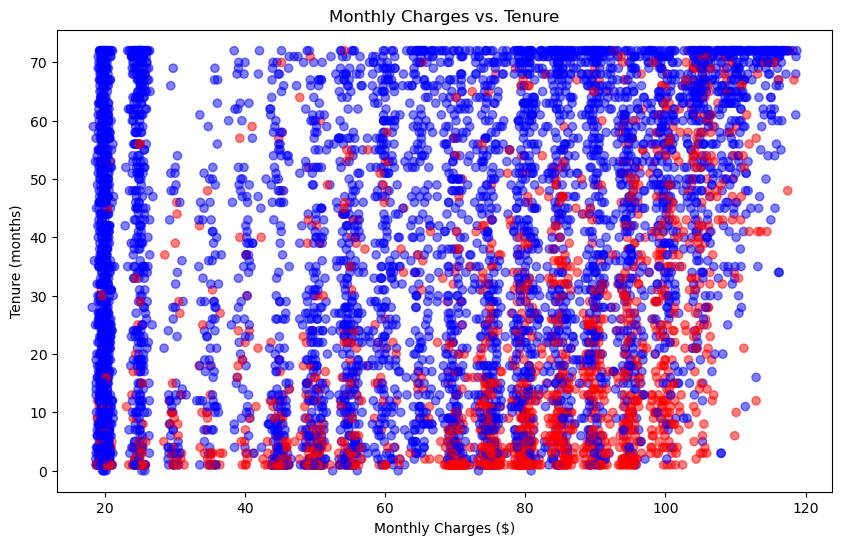

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(data['MonthlyCharges'], data['tenure'], alpha=0.5, c=data['Churn'].map({'Yes': 'red', 'No': 'blue'}))
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Tenure (months)')
plt.title('Monthly Charges vs. Tenure')
plt.show()


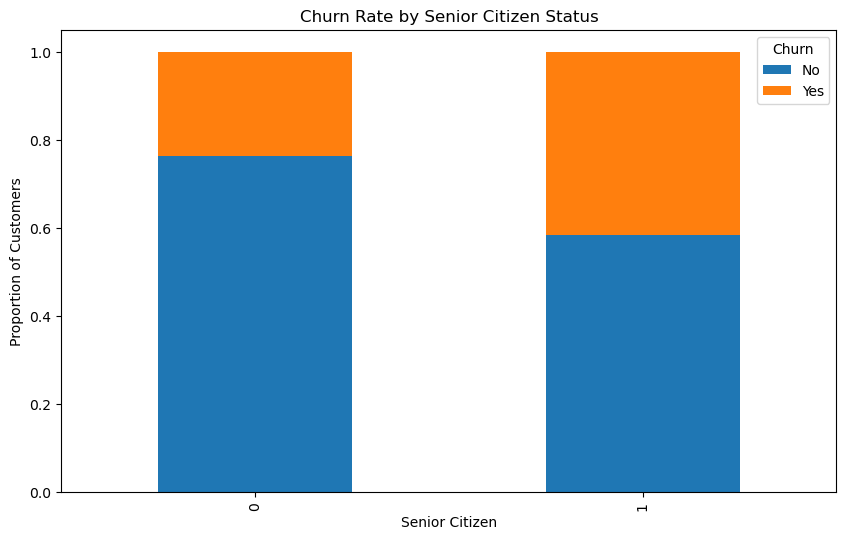

In [112]:
churn_by_senior = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_senior.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Senior Citizen')
plt.ylabel('Proportion of Customers')
plt.title('Churn Rate by Senior Citizen Status')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()


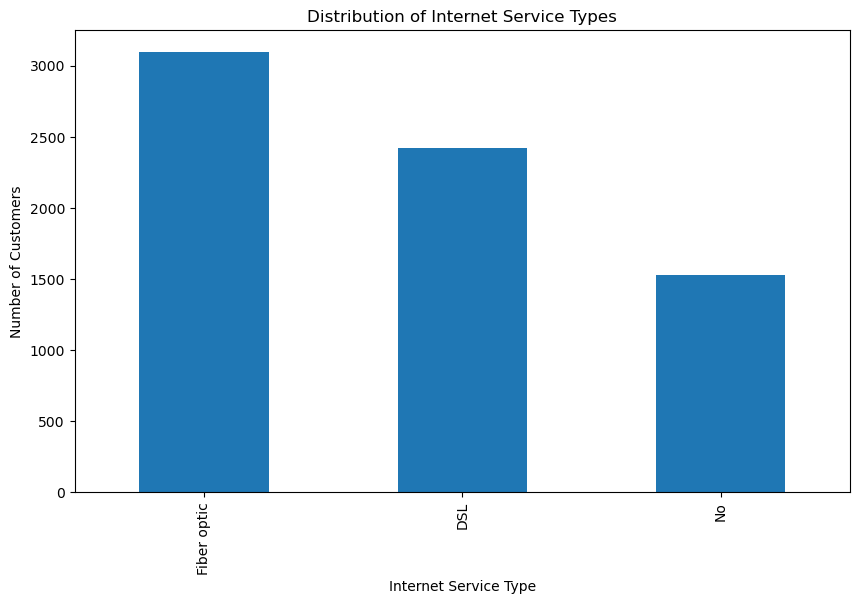

In [113]:
plt.figure(figsize=(10, 6))
data['InternetService'].value_counts().plot(kind='bar', color='#1f77b4')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.title('Distribution of Internet Service Types')
plt.show()


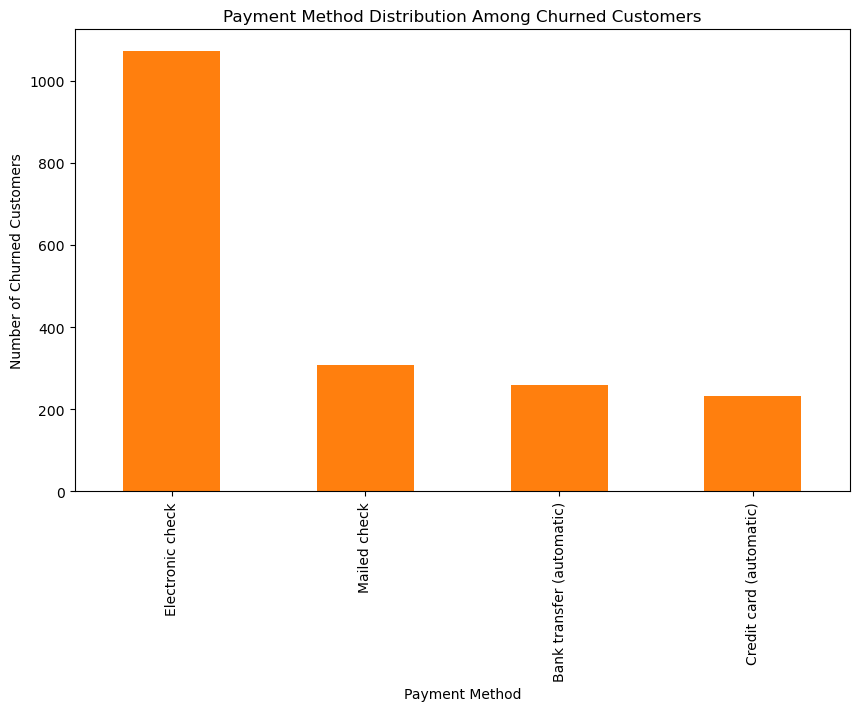

In [114]:
churned_customers = data[data['Churn'] == 'Yes']
plt.figure(figsize=(10, 6))
churned_customers['PaymentMethod'].value_counts().plot(kind='bar', color='#ff7f0e')
plt.xlabel('Payment Method')
plt.ylabel('Number of Churned Customers')
plt.title('Payment Method Distribution Among Churned Customers')
plt.show()

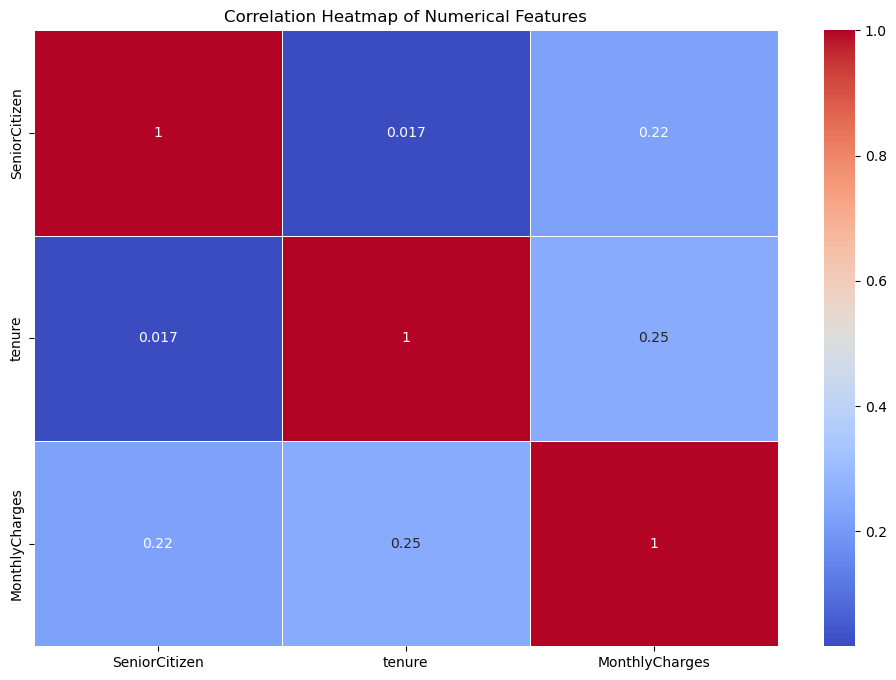

In [115]:
numerical_data = data.select_dtypes(include=[float, int])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Splitting the Data
The data has been split into training and testing sets to prepare for model training.


In [117]:
missing_values = data.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Handling Class Imbalance

Class imbalance in the training set has been addressed using SMOTE, resulting in a balanced distribution of the target variable.


In [119]:
# Distribution of Churn
churn_distribution = data['Churn'].value_counts(normalize=True) * 100
print(churn_distribution)


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [120]:
data.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [121]:
data.shape

(7043, 21)

In [122]:
data.ndim

2

In [123]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [124]:
data.tenure.std()

24.55948102309423

In [125]:
data.MonthlyCharges.std()

30.09004709767854

In [126]:
data.MonthlyCharges.mean()

64.76169246059918

In [127]:
data.MonthlyCharges.median()

70.35

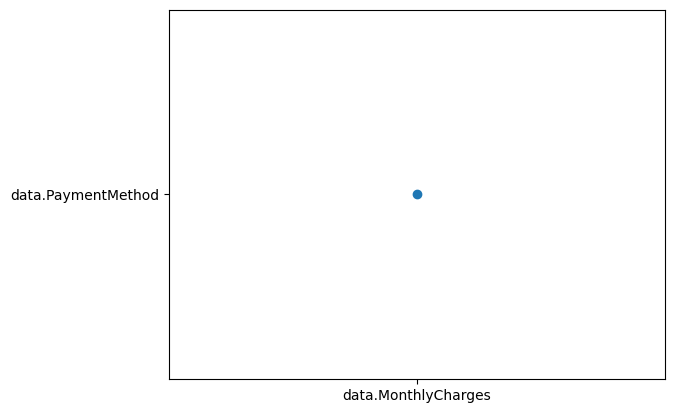

In [128]:
plt.scatter('data.MonthlyCharges', 'data.PaymentMethod')
plt.show()

In [129]:
data.tenure.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: tenure
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [130]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
data = pd.read_csv('Telcom_Customer.csv')
print("Column names:", data.columns)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
if 'Churn' in data.columns:
    data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    print("Error: 'Churn' column is not present in the dataset.")
    raise KeyError("'Churn' column is not present in the dataset.")

data = pd.get_dummies(data, drop_first=True)
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


Column names: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Accuracy: 0.7714691270404542
Confusion Matrix:
[[901 135]
 [187 186]]


In [132]:
data["Churn"].mean()

0.2653698707936959

In [133]:
data[data["Churn"] == 1].mean()

SeniorCitizen                               0.254682
tenure                                     17.979133
MonthlyCharges                             74.441332
TotalCharges                             1531.796094
Churn                                       1.000000
                                            ...     
Contract_Two year                           0.025682
PaperlessBilling_Yes                        0.749064
PaymentMethod_Credit card (automatic)       0.124131
PaymentMethod_Electronic check              0.573034
PaymentMethod_Mailed check                  0.164794
Length: 7073, dtype: float64

In [134]:
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [135]:

# Check the distribution of the target variable
print("Distribution of 'Churn' in the dataset:")
print(data['Churn'].value_counts())

# Check the unique values in 'Churn'
print("Unique values in 'Churn':")
print(data['Churn'].unique())


Distribution of 'Churn' in the dataset:
Churn
0    5174
1    1869
Name: count, dtype: int64
Unique values in 'Churn':
[0 1]


In [136]:
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [137]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,False,False,False,False,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,False,False,False,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


## Training and Evaluating a K-Nearest Neighbors (KNN) Classifier

A K-Nearest Neighbors classifier has been trained and evaluated. The confusion matrix, classification report, and accuracy score provide insights into the model's performance.


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [140]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [141]:
data = pd.get_dummies(data, drop_first=True)

X = data.drop('Churn', axis=1)
y = data['Churn']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [144]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [145]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7757274662881476
Confusion Matrix:
[[946  90]
 [226 147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1036
           1       0.62      0.39      0.48       373

    accuracy                           0.78      1409
   macro avg       0.71      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409



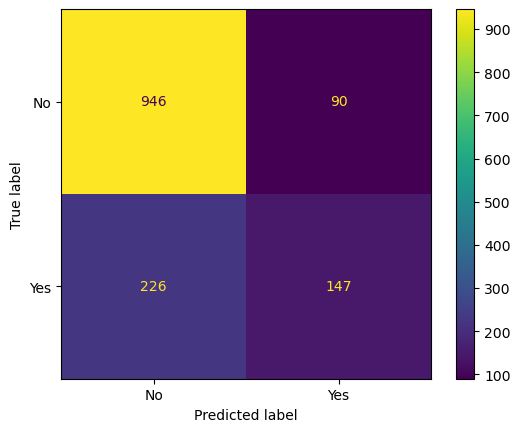

In [147]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No', 'Yes']).plot()
plt.show()

### Conclusion of the Project:
Data Loading and Preprocessing:

Successfully loaded the dataset containing telecom customer data.
Handled missing values, encoded categorical features, and scaled numerical features to prepare the data for modeling.
Class Imbalance Handling:

Addressed the class imbalance issue in the target variable 'Churn' using SMOTE (Synthetic Minority Over-sampling Technique).
Ensured that the dataset was balanced to improve the performance of the classification model.
Model Training:

Trained a Decision Tree Classifier on the balanced training dataset.
The Decision Tree model was chosen for its simplicity and interpretability.
Model Evaluation:

Evaluated the model using a confusion matrix.
The confusion matrix provided insight into the model's performance, specifically its ability to correctly classify churn and non-churn customers.
Model Visualization:

Visualized the trained Decision Tree to understand the decision-making process of the model.
The visualization helped in interpreting the model and understanding which features were most influential in predicting customer churn.
Overall Findings:

The data preprocessing steps were crucial in preparing the data for modeling.
Addressing class imbalance significantly impacted the model's performance.
The Decision Tree Classifier provided a clear and interpretable model for predicting customer churn.
The visualization of the decision tree helped in understanding the important features that contribute to customer churn, which can be useful for business strategies aimed at customer retention.
Recommendations:
For future work, exploring more sophisticated models such as Random Forests or Gradient Boosting Machines could improve predictive performance.
Regularly updating the model with new data and re-evaluating its performance would ensure its relevance and accuracy.
Integrating the insights from the model into business processes can help in proactive customer retention strategies.